In [105]:
from keras.datasets import imdb
(train_data, train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

In [124]:
import numpy as np
length = [len (x) for x in train_data]#list comprehension
print('min:',np.min(length))
print('max:',np.max(length))
print('avg:',np.mean(length))
print('stdv:',np.std(length))
print(len(train_labels))
print(len(train_data))

min: 11
max: 2494
avg: 238.71364
stdv: 176.49367364852034
25000
25000


In [107]:
#print(train_data[0])#each number represents a word. this is natural language processing. the length of the array is the number of words. 

In [108]:
word_index = imdb.get_word_index() #get the dictionary

In [109]:
print(len(word_index))

88584


In [110]:
#print(word_index)

In [111]:
reverse_word_index = dict(#the word index attributes a word to a number. we want to do the reverse, for reading the reviews
    [(value,key) for (key,value) in word_index.items()]
)
#print(reverse_word_index)


In [112]:
review = train_data[0]
label = train_labels[0]
decoded_review = ' '.join(#' '.join() will join words with blank spaces
    [reverse_word_index.get(index - 3,'?') for index in review] #go to the dictionary and get the word associated to the index. 
)#if the index is not there, write a question mark. 3 is the number of reserved words. varies from dictionary to dictionary.

print(label)
print(decoded_review)

1
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you t

In [113]:
def vectorize_sequences(sequences, dimension = 10000):#create bag of words, basically [1,0,0,0,1,1,0]
    results = np.zeros((len(sequences),dimension))
    
    for i, sequence in enumerate(sequences):#goes through the sequence of words (each review) and keeps track of the sequence (that's enumerate)
        results[i,sequence] = 1.0#fancy indexing. float because keras is built on tensorflow
    return results
#x for input
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train[0])
print(x_train[0].shape)
print(x_train.shape)

[0. 1. 1. ... 0. 0. 0.]
(10000,)
(25000, 10000)


In [114]:
#y for output
y_train = np.asarray(train_labels).astype('float32')#convert labels to float32
y_test = np.asarray(test_labels).astype('float32')#no need to do categorical

In [115]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16,
                       activation = 'relu',
                       input_shape = (10000,)))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()#textual representation of NN architecture

#from keras import optimizers, losses, metrics####get back to this block later
#model.compile(
    #optimizer=optimizers.RMSprop(lr = 0.001),
    #loss = losses.binary_accuracy,#we call a method, that's why there is no () after it
    #metrics=[metrics.binary_accuracy]
#)

model.compile(
    optimizer = 'rmsprop',
    loss='binary_crossentropy',
    metrics = ['accuracy']
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_23 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [116]:
#validate the model before training. a small loss will tell us that our model is good at optimizing. 
#then we can train the model
#split data into 70% train, 10% validation, 20% test

#validation loss is very important 

In [117]:
x_val = x_train[:10000]#divide the data into train and validation
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [118]:
history = model.fit(
    partial_x_train, partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val,y_val)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 220us/step - loss: 0.4976 - acc: 0.7953 - val_loss: 0.3717 - val_acc: 0.8722
Epoch 2/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.2957 - acc: 0.9046 - val_loss: 0.2990 - val_acc: 0.8910
Epoch 3/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.2160 - acc: 0.9286 - val_loss: 0.3088 - val_acc: 0.8713
Epoch 4/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.1742 - acc: 0.9433 - val_loss: 0.2830 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 2s 161us/step - loss: 0.1414 - acc: 0.9543 - val_loss: 0.2863 - val_acc: 0.8851
Epoch 6/20
15000/15000 [==============================] - 2s 161us/step - loss: 0.1143 - acc: 0.9653 - val_loss: 0.3086 - val_acc: 0.8809
Epoch 7/20
15000/15000 [==============================] - 2s 161us/step - loss: 0.0970 - acc: 0.9709 - val_loss: 0.3147 - 

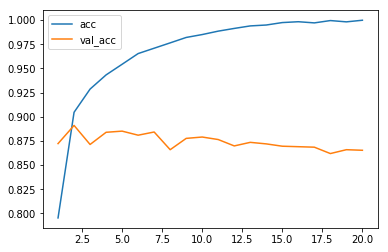

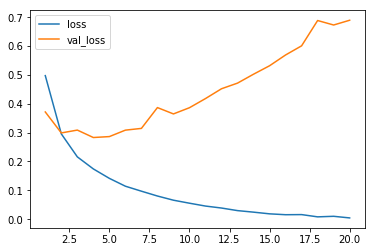

In [123]:
import matplotlib.pyplot as plt 

r = range(1,len(history.history['acc']) + 1)

plt.plot(r, history.history['acc'], label = 'acc')
plt.plot(r, history.history['val_acc'], label = 'val_acc')
plt.legend()
plt.show()
plt.close()
plt.show()

r = range(1,len(history.history['loss']) + 1)

plt.plot(r, history.history['loss'], label = 'loss')
plt.plot(r, history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.close()
plt.show()




In [120]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 128us/step


[0.762366857085228, 0.84952]

In [ ]:
#it's better to run into overfitting first (high training accuracy and low loss) and then compensate